In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train (2).csv')
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [3]:
df.shape

(45211, 11)

In [4]:
df.head

<bound method NDFrame.head of        age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary    unknown    5  may   261   
1       44    technician    single      secondary    unknown    5  may   151   
2       33  entrepreneur   married      secondary    unknown    5  may    76   
3       47   blue-collar   married        unknown    unknown    5  may    92   
4       33       unknown    single        unknown    unknown    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       nu

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
df = df.drop_duplicates()

In [8]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [9]:
df.shape

(45205, 11)

CORRECTION OF OUTLIERS 

In [10]:
iqr = df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
upper_limit = df['dur'].quantile(0.75) + (1.5 * iqr)
lower_limit = df['dur'].quantile(0.25) - (1.5 * iqr)
upper_limit , lower_limit 

(643.0, -221.0)

In [11]:
df['dur'] = df['dur'].clip(lower_limit , upper_limit)

<ipython-input-11-8101ee941c0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dur'] = df['dur'].clip(lower_limit , upper_limit)


In [12]:
iqr = df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
upper_limit = df['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_limit = df['num_calls'].quantile(0.25) - (1.5 * iqr)
upper_limit , lower_limit 

(6.0, -2.0)

In [13]:
df['num_calls'] = df['num_calls'].clip(lower_limit , upper_limit)

<ipython-input-13-707f219ea1fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_calls'] = df['num_calls'].clip(lower_limit , upper_limit)


In [14]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


EDA

In [15]:
df.age.value_counts()

32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [16]:
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

impute unknown values with mode of job

In [18]:
df['job'] = df['job'].replace(['unknown'] , df['job'].mode())

<ipython-input-18-483d8c604b52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].replace(['unknown'] , df['job'].mode())


In [19]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [20]:
df.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [21]:
df.education_qual.value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [22]:
df['education_qual'] = df['education_qual'].replace(['unknown'],df['education_qual'].mode())


<ipython-input-22-515e80270c36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual'] = df['education_qual'].replace(['unknown'],df['education_qual'].mode())


In [23]:
df.call_type.value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [24]:
df.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [25]:
df.mon.value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [26]:
df.dur.value_counts()

643.0    3247
124.0     187
90.0      184
89.0      177
114.0     175
         ... 
598.0       7
3.0         4
0.0         3
2.0         3
1.0         2
Name: dur, Length: 644, dtype: int64

In [27]:
df.num_calls.value_counts()

1.0    17542
2.0    12503
3.0     5521
6.0     4355
4.0     3520
5.0     1764
Name: num_calls, dtype: int64

In [28]:
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [29]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [30]:
df['target'] = df['y'].map({"yes" : 1 , "no" : 0})

<ipython-input-30-8ce94470d397>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = df['y'].map({"yes" : 1 , "no" : 0})


In [31]:
df.target.value_counts()

0    39916
1     5289
Name: target, dtype: int64

In [32]:
df.y.value_counts()

no     39916
yes     5289
Name: y, dtype: int64

In [33]:
df.groupby("job")["target"].mean()

job
admin.           0.122050
blue-collar      0.074067
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: target, dtype: float64

<Axes: ylabel='job'>

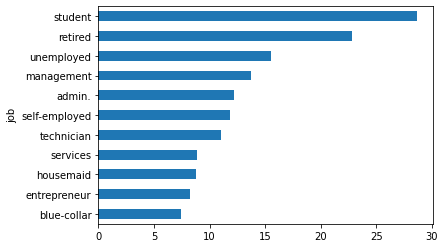

In [34]:
(df.groupby("job")["target"].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='marital'>

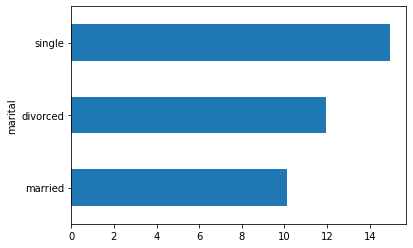

In [35]:
(df.groupby("marital")["target"].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='education_qual'>

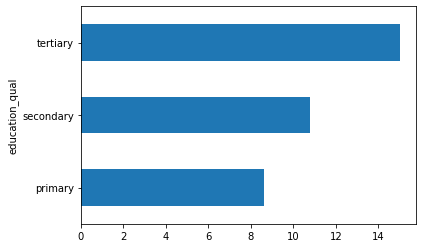

In [36]:
(df.groupby("education_qual")["target"].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='call_type'>

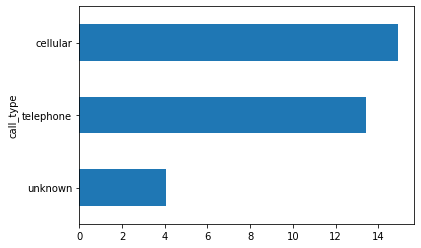

In [37]:
(df.groupby("call_type")["target"].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='mon'>

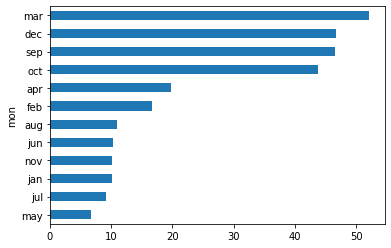

In [38]:
(df.groupby("mon")["target"].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='prev_outcome'>

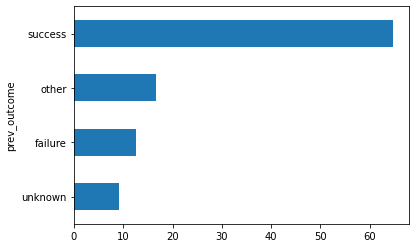

In [39]:
(df.groupby("prev_outcome")["target"].mean()*100).sort_values().plot(kind = 'barh')

<Axes: ylabel='job'>

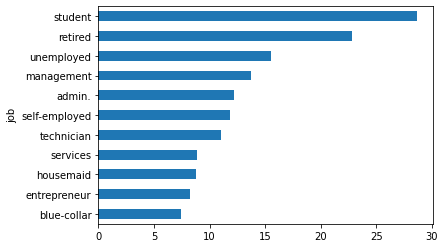

In [40]:
(df.groupby("job")["target"].mean()*100).sort_values().plot(kind = 'barh')

In [41]:
df['job'].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [42]:
#LABEL ENCODING FOR JOB COLUMN
df['job'] = df['job'].map({"blue-collar" : 0 , "entrepreneur" : 1 , "housemaid" : 2 , "services" : 3 , "technician" : 4 , "self-employed" : 5 , "admin." : 6 , "management" : 7 , "unemployed" : 8 , "retired" : 9 , "student" : 10})


<ipython-input-42-562007a95073>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job'] = df['job'].map({"blue-collar" : 0 , "entrepreneur" : 1 , "housemaid" : 2 , "services" : 3 , "technician" : 4 , "self-employed" : 5 , "admin." : 6 , "management" : 7 , "unemployed" : 8 , "retired" : 9 , "student" : 10})


In [43]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
target            0
dtype: int64

In [44]:
df['marital'] = df['marital'].map({"married" : 0 , "divorced" : 1 , "single" : 2})

<ipython-input-44-2b6bb549b913>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital'] = df['marital'].map({"married" : 0 , "divorced" : 1 , "single" : 2})


In [45]:
df['education_qual'] = df['education_qual'].map({"primary" : 0 , "secondary" : 1 , "tertiary" : 2})

<ipython-input-45-5f7725a8463a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_qual'] = df['education_qual'].map({"primary" : 0 , "secondary" : 1 , "tertiary" : 2})


In [46]:
df['call_type'] = df['call_type'].map({"unknown" : 0 , "telephone" : 1 , "cellular" : 2})

<ipython-input-46-bf9c7930dce3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['call_type'] = df['call_type'].map({"unknown" : 0 , "telephone" : 1 , "cellular" : 2})


In [47]:
df['mon'] = df['mon'].map({"may" : 0 , "jul" : 1 , "jan" : 2 , "nov" : 3 , "jun" : 4 , "aug" : 5 , "feb" : 6 , "apr" : 7 , "oct" : 8 , "dec" : 9 , "sep" : 10 , "mar" : 11})

<ipython-input-47-09df7631b8de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mon'] = df['mon'].map({"may" : 0 , "jul" : 1 , "jan" : 2 , "nov" : 3 , "jun" : 4 , "aug" : 5 , "feb" : 6 , "apr" : 7 , "oct" : 8 , "dec" : 9 , "sep" : 10 , "mar" : 11})


In [48]:
df['prev_outcome'] = df['prev_outcome'].map({"unknown" : 0 , "failure" : 1 , "other" : 2 , "success" : 3})

<ipython-input-48-a9da40176e9a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_outcome'] = df['prev_outcome'].map({"unknown" : 0 , "failure" : 1 , "other" : 2 , "success" : 3})


In [49]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,7,0,2,0,5,0,261.0,1.0,0,no,0
1,44,4,2,1,0,5,0,151.0,1.0,0,no,0
2,33,1,0,1,0,5,0,76.0,1.0,0,no,0
3,47,0,0,1,0,5,0,92.0,1.0,0,no,0
4,33,0,2,1,0,5,0,198.0,1.0,0,no,0


SPLITTING OF DATA 

In [50]:
c = [*df.columns]
c

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome',
 'y',
 'target']

In [51]:
c[:-2]

['age',
 'job',
 'marital',
 'education_qual',
 'call_type',
 'day',
 'mon',
 'dur',
 'num_calls',
 'prev_outcome']

In [52]:
X = df.loc[: , c[:-2]].values
y = df.loc[: , c[-1]].values

In [53]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size = 0.3 , stratify = y, random_state = 10 )

https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/

https://towardsdatascience.com/3-tips-for-working-with-imbalanced-datasets-a765a0f3a0d0

https://towardsdatascience.com/the-right-way-of-using-smote-with-cross-validation-92a8d09d00c7

BALANCING THE DATA USING SMOTEENN

In [54]:
df.shape

(45205, 12)

In [55]:
len(X_train) ,len(y_train)

(31643, 31643)

In [56]:
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy = 'all')
X_smt , y_smt = smt.fit_resample(X_train , y_train)

In [57]:
len(X_smt) , len(y_smt)

(47834, 47834)

In [58]:
bd = pd.DataFrame(X_smt , columns = df.columns[:-2])

In [59]:
bd['y'] = y_smt 

In [60]:
bd.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,30.0,7.0,2.0,2.0,2.0,11.0,5.0,217.0,2.0,0.0,0
1,35.0,6.0,0.0,1.0,0.0,20.0,0.0,47.0,3.0,0.0,0
2,35.0,0.0,0.0,1.0,1.0,13.0,0.0,155.0,6.0,0.0,0
3,38.0,4.0,0.0,1.0,0.0,8.0,0.0,20.0,2.0,0.0,0
4,30.0,6.0,0.0,1.0,2.0,29.0,1.0,176.0,6.0,0.0,0


[]

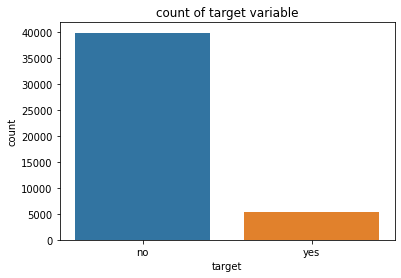

In [61]:
#original data set 
sns.countplot(x = df.y , data = df)
plt.xlabel('target')
plt.title('count of target variable')
plt.plot()

[]

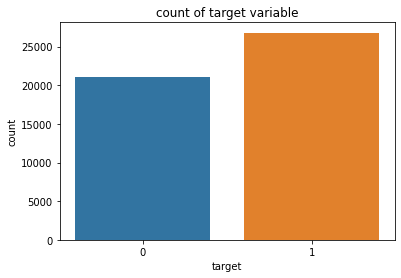

In [62]:
#balanced dataset
sns.countplot(x = bd.y , data = bd)
plt.xlabel('target')
plt.title('count of target variable')
plt.plot()

MODELING

In [63]:
import warnings
warnings.filterwarnings('ignore')

LOGISTIC REGRESSION

In [64]:
#LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_smt , y_smt)
lr.score(X_test , y_test)

0.7345524258958855

In [65]:
from sklearn.metrics import roc_auc_score
LR = roc_auc_score(y_test , lr.predict_proba(X_test)[:,1])
LR

0.8706256602115571

DECISION TREE

In [66]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_smt , y_smt)
DT = roc_auc_score(y_test , dt.predict_proba(X_test)[:,1])
DT

0.7983523487416679

XGBOOST

In [67]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
for x in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]:
  model=xgb.XGBClassifier(learning_rate = x , n_estimators = 100 , verbosity = 0)
  model.fit(X_smt , y_smt)
  model.score(X_test , y_test)
  print('Learning rate :' , x , 'Train Score:' , model.score(X_smt , y_smt) , "cross-val-score :" , np.mean(cross_val_score(model ,X_smt , y_smt , cv=10)))

Learning rate : 0.01 Train Score: 0.941798720575323 cross-val-score : 0.9385592009255188
Learning rate : 0.02 Train Score: 0.9518334239244053 cross-val-score : 0.9477996861445602
Learning rate : 0.03 Train Score: 0.9601956767153071 cross-val-score : 0.9553886587600877
Learning rate : 0.04 Train Score: 0.9661746874608019 cross-val-score : 0.9596118621763114
Learning rate : 0.05 Train Score: 0.9689969477777313 cross-val-score : 0.9613054299053854
Learning rate : 0.06 Train Score: 0.9715265292469791 cross-val-score : 0.9624136783913484
Learning rate : 0.07 Train Score: 0.9739306769243634 cross-val-score : 0.9639607327582288
Learning rate : 0.08 Train Score: 0.9760630513860434 cross-val-score : 0.9641281578709993
Learning rate : 0.09 Train Score: 0.9771292386168834 cross-val-score : 0.9642955960945852
Learning rate : 0.1 Train Score: 0.9789062173349501 cross-val-score : 0.9657170488498492


In [69]:
print ("scores of algorithms:")
print("Logistic Regression : ", LR)
print("Decision Tree :" , DT)
print("XGBoost : 0.96" )

scores of algorithms:
Logistic Regression :  0.8706256602115571
Decision Tree : 0.7983523487416679
XGBoost : 0.96
